<a href="https://colab.research.google.com/github/Sashwat22/GIT-DEMO1/blob/main/CS445_Proj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programming Project #1: Hybrid Images

## CS445: Computational Photography

### Part I: Hybrid Images

In [119]:
# Optional, if using Google Colab w/ Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)



Mounted at /content/drive


In [120]:

import cv2

import numpy as np
from matplotlib.colors import LogNorm
from scipy import signal
import scipy

# modify to where you store your project data including utils.py
datadir = '/content/drive/My Drive/Colab Notebooks/hybrid/'

utilfn = datadir + "utils.py"
!cp "$utilfn" .
import utils

In [165]:
# switch from notebook to inline if using colab or otherwise cannot use interactive display)
%matplotlib inline
import matplotlib.pyplot as plt

In [245]:
# im1_file = datadir + 'sash.jpg'
# im2_file = datadir + 'nutmeg.jpg'
im1_file = '/content/sash.jpg'
im2_file = '/content/dog.jpeg'

im1 = cv2.imread(im1_file)
im2 = cv2.imread(im2_file)

im1 = np.float32(cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im2 = np.float32(cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE) / 255.0)

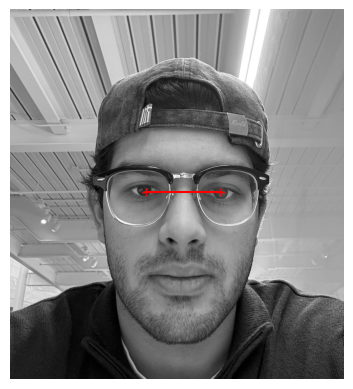

In [256]:
pts_im1 = utils.prompt_eye_selection(im1)
pts_im1 = np.array([[440, 590], [680, 590]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im1[:,0], pts_im1[:,1], 'r-+')

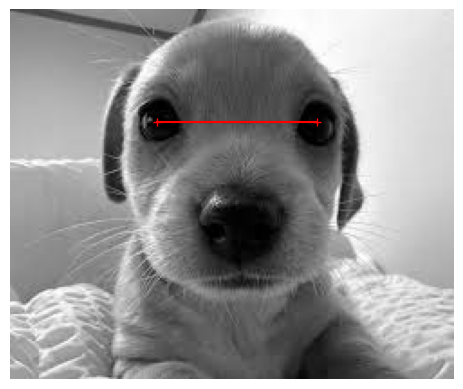

In [257]:

pts_im2 = utils.prompt_eye_selection(im2)
pts_im2 = np.array([[81,62], [170,62]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im2[:,0], pts_im2[:,1], 'r-+')

In [258]:
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)


In [259]:
# convert to grayscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

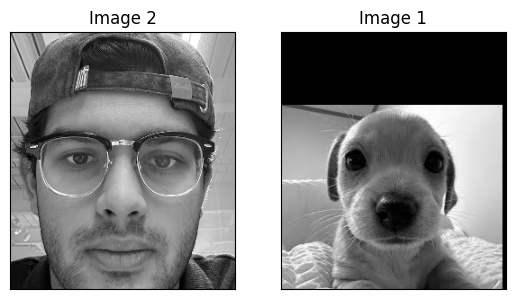

In [260]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 2'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 1'), axes[1].set_xticks([]), axes[1].set_yticks([]);

In [237]:
def plot_fft(image, title="FFT Magnitude"):

    magnitude = np.log(np.abs(np.fft.fftshift(np.fft.fft2(image))))

    plt.figure()
    plt.imshow(magnitude, cmap='gray')
    plt.title(title)
    plt.colorbar()

In [263]:
def hybridImage(im1, im2, sigma_low, sigma_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        sigma_low: standard deviation for the low-pass filter
        sigma_high: standard deviation for the high-pass filter

    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    '''

    # your code goes here
    first_k = utils.gaussian_kernel(sigma_low, 3*sigma_low)
    im1_low  = signal.convolve2d(im1, first_k, mode='same')

    second_k = utils.gaussian_kernel(sigma_high, sigma_high)
    im2_high  = im2 - signal.convolve2d(im2, second_k, mode='same')

    hybrid = 1.0 * im1_low + 0.6 * im2_high

    # plt.figure()
    # plt.imshow(im1_low, cmap='gray')
    # plt.title("Low-Pass Filtered Image 1")

    # plt.figure()
    # plt.imshow(im2_high, cmap='gray')
    # plt.title("High-Pass Filtered Image 2")

    plt.figure()
    plt.imshow(hybrid, cmap='gray')
    plt.title("Hybrid Image")

    # plot_fft(im1, "FFT of Input Image 1")
    # plot_fft(im2, "FFT of Input Image 2")

    # plot_fft(im1_low, "FFT of Low-Pass Filtered Image 1")
    # plot_fft(im2_high, "FFT of High-Pass Filtered Image 2")

    # plot_fft(hybrid, "FFT of Hybrid Image")


    return hybrid


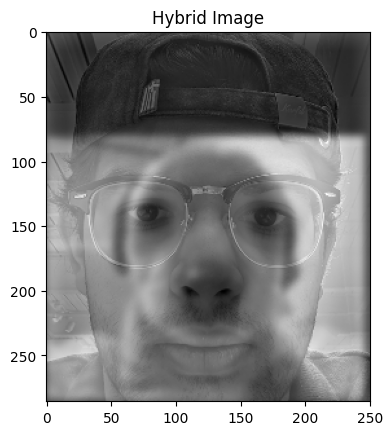

In [264]:
sigma_low = 3 # choose parameters that work for your images
sigma_high = 15

im_hybrid = hybridImage(im2, im1, sigma_low, sigma_high)


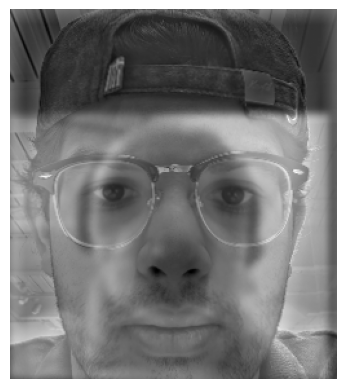

In [70]:
# Optional: Select top left corner and bottom right corner to crop image
# the function returns dictionary of
# {
#   'cropped_image': np.ndarray of shape H x W
#   'crop_bound': np.ndarray of shape 2x2
# }
cropped_object = utils.interactive_crop(im_hybrid)

### Part II: Image Enhancement

##### Two out of three types of image enhancement are required.  Choose a good image to showcase each type and implement a method.  This code doesn't rely on the hybrid image part.

#### Contrast enhancement

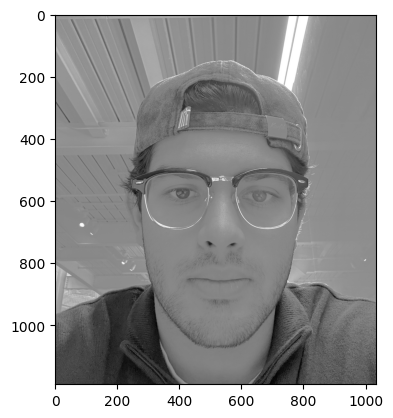

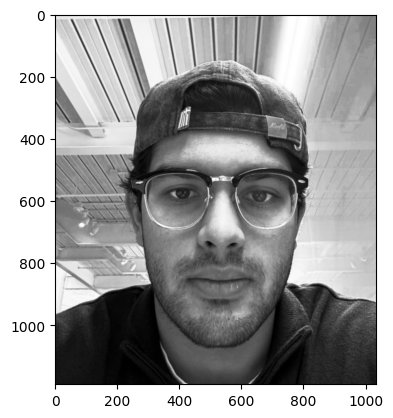

In [131]:
im1_file = '/content/noContrast.jpg'
im1 = cv2.imread(im1_file,cv2.IMREAD_GRAYSCALE)

im1_eq = cv2.equalizeHist(im1)
im1_out = scipy.ndimage.gaussian_filter(im1_eq, sigma=1)

plt.figure()
plt.imshow(im1,cmap='gray')

plt.figure()
plt.imshow(im1_out,cmap='gray')

In [132]:
def contrast (path):
  image_og = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
  ycrcb_img = cv2.cvtColor(image_og, cv2.COLOR_RGB2YCrCb)
  ycrcb_img[:,:,0] = cv2.equalizeHist(ycrcb_img[:,:,0])
  image_eq = cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2RGB)

  fig, axes = plt.subplots(2, 1)
  axes[0].imshow(image_og)
  axes[0].set_title('Original'), axes[0].set_xticks([]), axes[0].set_yticks([])
  axes[0].axis('off')
  axes[1].imshow(image_eq)
  axes[1].set_title('Equalized'), axes[1].set_xticks([]), axes[1].set_yticks([])
  axes[1].axis('off')
  plt.show()

  return image_eq

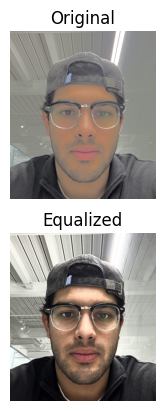

In [133]:
path = '/content/noContrast.jpg'
CE = contrast(path)

#### Color enhancement

In [135]:
def Color(path1, f):
  image_og = cv2.cvtColor(cv2.imread(path1), cv2.COLOR_BGR2RGB)
  hsv = cv2.cvtColor(image_og, cv2.COLOR_RGB2HSV)
  hsv[:,:,1] = hsv[:,:,1]*f
  hsv[:,:,1][hsv[:,:,1]>255]  = 255
  hsv[:,:,1][hsv[:,:,1]<0] = 0
  C = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

  fig, axes = plt.subplots(2,1, figsize=(10,8))
  axes[0].imshow(image_og)
  axes[0].set_title("og")
  axes[0].axis('off')
  axes[1].imshow(C)
  axes[1].set_title("Color")
  axes[1].axis('off')
  plt.show()

  return C

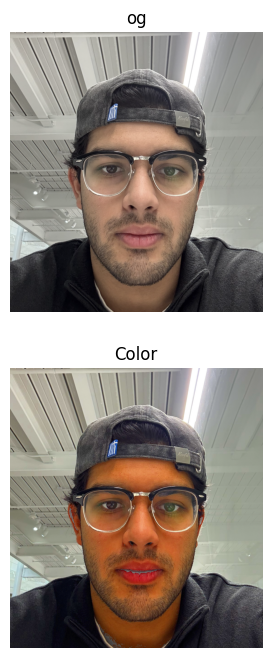

In [136]:
color = Color('/content/sash.jpg', 2)

#### Color shift

In [178]:
def shift (path):
  lab_o = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
  lab = cv2.cvtColor(lab_o, cv2.COLOR_RGB2LAB)
  lab1 = lab.copy()
  lab2 = lab.copy()
  mask1 = lab1[:,:,1] > 100
  mask2 = lab2[:,:,2] > 100
  lab1[:,:,1][mask1] = np.clip(lab1[:,:,1][mask1] + 15, 0, 255)
  R = cv2.cvtColor(lab1, cv2.COLOR_LAB2RGB)
  lab2[:,:,2][mask2] = np.clip(lab2[:,:,2][mask2] + 15, 0, 255)
  Y = cv2.cvtColor(lab2, cv2.COLOR_LAB2RGB)

  fig, axes = plt.subplots(3, 1, figsize=(10,8))
  axes[0].imshow(lab_o)
  axes[0].set_title('Original')
  axes[0].axis('off')
  axes[1].imshow(R)
  axes[1].set_title('Red')
  axes[1].axis('off')
  axes[2].imshow(Y)
  axes[2].set_title('Yellow')
  axes[2].axis('off')
  plt.show()

  return R, Y


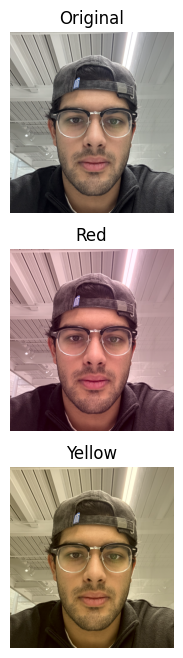

In [179]:
CS = shift('/content/sash.jpg')

Bells and whistles

In [149]:
im1_file = '/content/sash.jpg'
im2_file = '/content/dog.jpeg'
im1 = cv2.imread(im1_file)
im2 = cv2.imread(im2_file)
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)

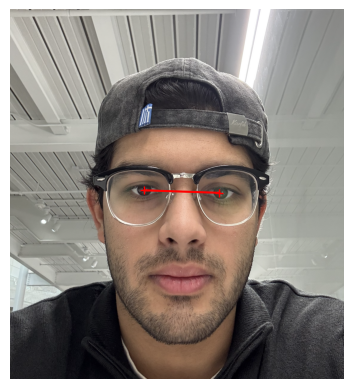

In [150]:
pts_im1 = utils.prompt_eye_selection(im1)
pts_im1 = np.array([[434, 584], [676, 592]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im1[:,0], pts_im1[:,1], 'r-+')

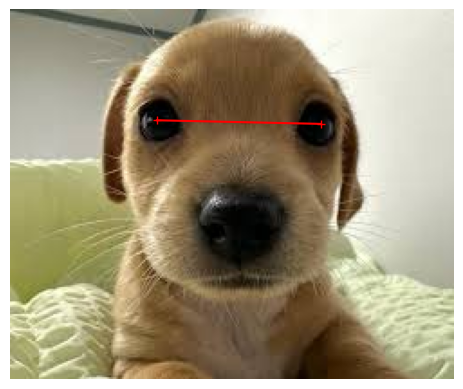

In [151]:
pts_im2 = utils.prompt_eye_selection(im2)
pts_im2 = np.array([[81,61], [172,63]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im2[:,0], pts_im2[:,1], 'r-+')

In [155]:
im1_aligned, im2_aligned = utils.align_images(im1_file, im2_file, pts_im1, pts_im2, save_images=False)

# Convert the aligned images from BGR to RGB
im1_aligned = cv2.cvtColor(im1_aligned, cv2.COLOR_BGR2RGB)
im2_aligned = cv2.cvtColor(im2_aligned, cv2.COLOR_BGR2RGB)

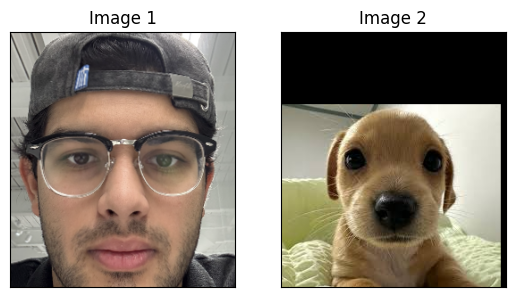

In [156]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1_aligned,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2_aligned,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

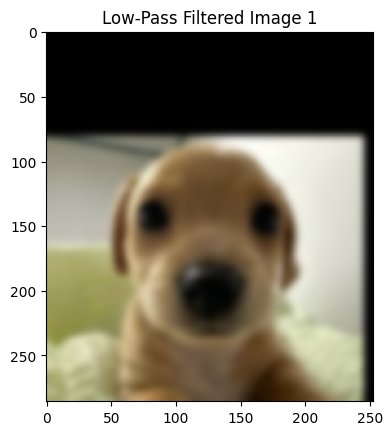

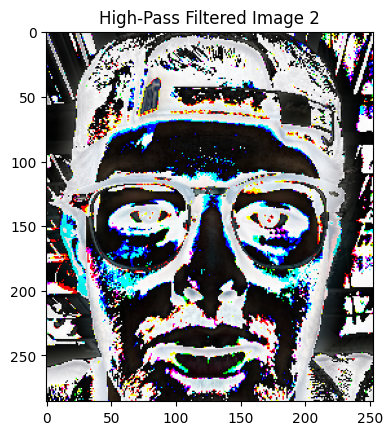

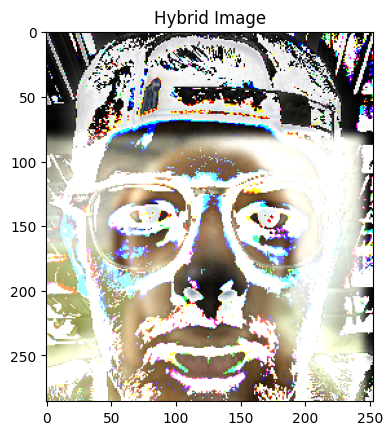

In [181]:
sigma_high = 15
sigma_low = 3
im_hybrid = hybridColor(im2_aligned, im1_aligned, sigma_low, sigma_high)

In [242]:
def build_gaussian_pyramid(image, levels):

    gaussian_pyr = [image]
    current_image = image.copy()
    for i in range(1, levels):
        # Compute new size; ensure dimensions don't become zero.
        new_width = max(1, current_image.shape[1] // 2)
        new_height = max(1, current_image.shape[0] // 2)
        new_size = (new_width, new_height)
        current_image = cv2.resize(current_image, new_size, interpolation=cv2.INTER_LINEAR)
        gaussian_pyr.append(current_image)
    return gaussian_pyr

def build_laplacian_pyramid(gaussian_pyr):

    laplacian_pyr = []
    levels = len(gaussian_pyr)
    for i in range(levels - 1):
        # Upsample the next level to the size of the current level.
        size = (gaussian_pyr[i].shape[1], gaussian_pyr[i].shape[0])
        expanded = cv2.resize(gaussian_pyr[i+1], size, interpolation=cv2.INTER_LINEAR)
        # Compute the Laplacian image by subtracting the expanded image from the current level.
        laplacian = cv2.subtract(gaussian_pyr[i], expanded)
        laplacian_pyr.append(laplacian)
    laplacian_pyr.append(gaussian_pyr[-1])
    return laplacian_pyr

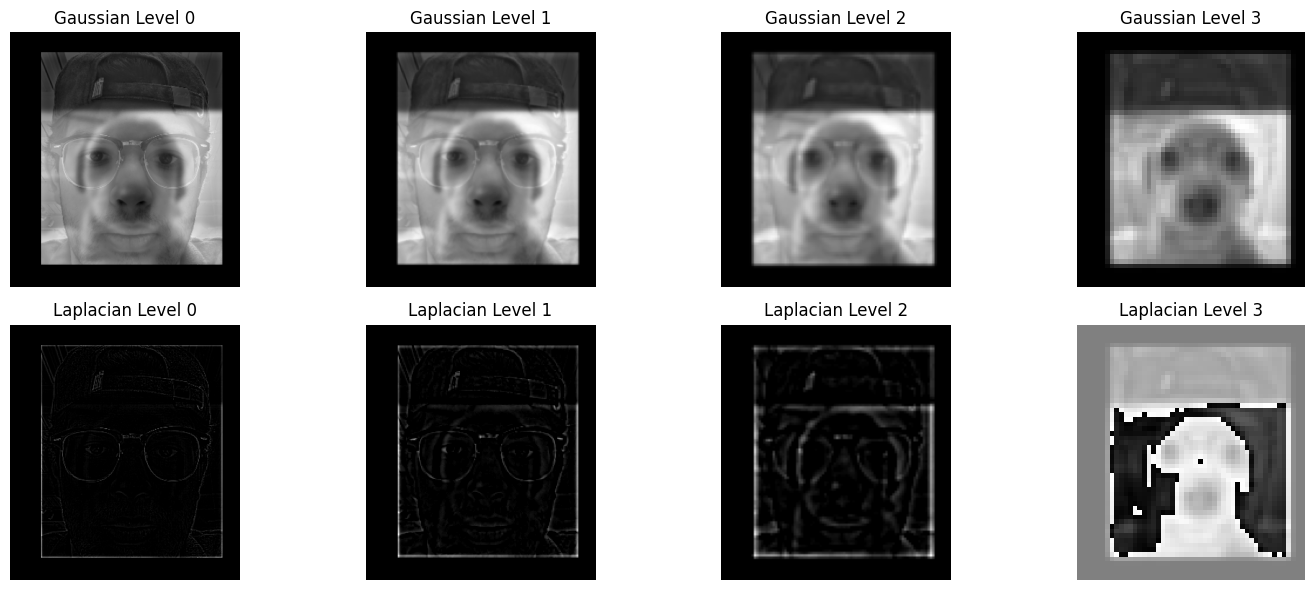

In [268]:

hybrid_gray = cv2.imread('/content/hybrid2.png', cv2.IMREAD_GRAYSCALE)
if hybrid_gray is None:
    raise IOError("Could not load the hybrid image. Check the file path.")

num_levels = 4

gaussian_pyr = build_gaussian_pyramid(hybrid_gray, num_levels)

laplacian_pyr = build_laplacian_pyramid(gaussian_pyr)
plt.figure(figsize=(15, 6))

# Gaussian pyramid i
for i in range(num_levels):
    plt.subplot(2, num_levels, i + 1)
    plt.imshow(gaussian_pyr[i], cmap='gray')
    plt.title(f"Gaussian Level {i}")
    plt.axis("off")

# Laplacian pyramid
for i in range(num_levels):
    plt.subplot(2, num_levels, num_levels + i + 1)
    lap_disp = np.clip(laplacian_pyr[i] + 128, 0, 255).astype(np.uint8)
    plt.imshow(lap_disp, cmap='gray')
    plt.title(f"Laplacian Level {i}")
    plt.axis("off")

plt.tight_layout()
plt.show()